In [166]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from matplotlib.cm import get_cmap
from matplotlib.colors import rgb2hex
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier


# in this book we test usecase of training the model without magnitude values (68 labels)

# dataset for training
prepared_table = pd.read_csv('./prepared_tables/2022_12_06-08_35_59_PM_Table_UP_Table_DOWN_uni_data_TEST.csv')
test_own_data = pd.read_csv('./prepared_tables/2022_12_06-08_34_32_PM_Table_UP_Table_DOWN_new_data_TEST.csv')

# dataset for testing
test_new_data = pd.read_csv('./prepared_tables/2022_12_06-08_31_06_PM_Table_UP_Table_DOWN.csv')
test_new_data_down_home = pd.read_csv('./prepared_tables/2022_12_06-11_32_18_PM_Table_UP_Table_DOWN_down_home_TEST.csv')

In [167]:
def removeNulls(df_sets, labels):
    print("No. of nulls: {}".format(df_sets.isna().sum().sum()))
    df_no_nulls = df_sets.dropna(subset=labels)
    print("No. of nulls: {}".format(df_no_nulls.isna().sum().sum()))
    return df_no_nulls

In [168]:
column_labels = [
    'tBodyAcc-mean()-X',
    'tBodyAcc-mean()-Y',
    'tBodyAcc-mean()-Z',
    'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
    'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
    'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z',
    'tBodyAcc-min()-X', 'tBodyAcc-min()-Y', 'tBodyAcc-min()-Z',
    'tBodyAcc-energy()-X', 'tBodyAcc-energy()-Y', 'tBodyAcc-energy()-Z',
    'tBodyAcc-iqr()-X', 'tBodyAcc-iqr()-Y', 'tBodyAcc-iqr()-Z',
    'tGravityAcc-mean()-X', 'tGravityAcc-mean()-Y', 'tGravityAcc-mean()-Z',
    'tGravityAcc-std()-X', 'tGravityAcc-std()-Y', 'tGravityAcc-std()-Z',
    'tGravityAcc-mad()-X', 'tGravityAcc-mad()-Y', 'tGravityAcc-mad()-Z',
    'tGravityAcc-max()-X', 'tGravityAcc-max()-Y', 'tGravityAcc-max()-Z',
    'tGravityAcc-min()-X', 'tGravityAcc-min()-Y', 'tGravityAcc-min()-Z',
    'tGravityAcc-energy()-X', 'tGravityAcc-energy()-Y',
    'tGravityAcc-energy()-Z', 'tGravityAcc-iqr()-X', 'tGravityAcc-iqr()-Y',
    'tGravityAcc-iqr()-Z', 'tBodyGyro-mean()-X', 'tBodyGyro-mean()-Y',
    'tBodyGyro-mean()-Z', 'tBodyGyro-std()-X', 'tBodyGyro-std()-Y',
    'tBodyGyro-std()-Z', 'tBodyGyro-mad()-X', 'tBodyGyro-mad()-Y',
    'tBodyGyro-mad()-Z', 'tBodyGyro-max()-X', 'tBodyGyro-max()-Y',
    'tBodyGyro-max()-Z', 'tBodyGyro-min()-X', 'tBodyGyro-min()-Y',
    'tBodyGyro-min()-Z', 'tBodyGyro-energy()-X', 'tBodyGyro-energy()-Y',
    'tBodyGyro-energy()-Z', 'tBodyGyro-iqr()-X', 'tBodyGyro-iqr()-Y',
    'tBodyGyro-iqr()-Z'
]

In [169]:
prepared_table_df = pd.DataFrame(prepared_table)
prepared_table_df_no_nulls = removeNulls(prepared_table_df, column_labels)
prepared_table_df_no_nulls

No. of nulls: 126
No. of nulls: 0


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,tBodyGyro-min()-X,tBodyGyro-min()-Y,tBodyGyro-min()-Z,tBodyGyro-energy()-X,tBodyGyro-energy()-Y,tBodyGyro-energy()-Z,tBodyGyro-iqr()-X,tBodyGyro-iqr()-Y,tBodyGyro-iqr()-Z,Activity
0,0.488941,0.106466,-0.498900,0.649484,1.734789,0.811103,0.559107,1.243836,0.701172,1.564101,...,-0.378126,-0.045662,-0.058338,0.023749,0.034132,0.008229,0.233274,0.175700,0.104763,WALKING_UPSTAIRS
1,0.437071,0.303639,-0.504424,0.611379,1.180292,0.790977,0.539568,0.871591,0.615926,1.453269,...,-0.257632,-0.463799,-0.215025,0.013525,0.067159,0.018413,0.220599,0.252745,0.244117,WALKING_UPSTAIRS
2,0.285927,0.216237,-0.395284,0.687936,1.402343,0.583938,0.570732,1.080691,0.463385,1.785157,...,-0.271071,-0.363159,-0.230907,0.031225,0.083592,0.014791,0.328340,0.496404,0.130267,WALKING_UPSTAIRS
3,0.578575,0.035007,-0.336702,0.515013,1.453956,0.930995,0.425783,1.120727,0.723397,1.416565,...,-0.265574,-0.338877,-0.266948,0.017495,0.063571,0.036401,0.187154,0.321239,0.313756,WALKING_UPSTAIRS
4,0.064121,-0.021307,-0.339204,0.316778,1.521262,0.578970,0.227586,1.139976,0.522901,0.969029,...,-0.365908,-0.537867,-0.252593,0.029636,0.055228,0.014284,0.264963,0.331700,0.126831,WALKING_UPSTAIRS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,-0.039138,0.041515,-0.011837,0.485389,2.013926,1.251686,0.372441,1.565776,0.959016,1.170730,...,-0.373077,-0.387329,-0.284653,0.091528,0.061591,0.017615,0.337692,0.318512,0.166183,WALKING_DOWNSTAIRS
301,-0.054918,0.099065,-0.013546,0.571308,1.988346,1.390825,0.405402,1.571122,0.969465,1.351241,...,-0.577606,-0.540726,-0.418869,0.078189,0.077746,0.030384,0.377090,0.410126,0.216248,WALKING_DOWNSTAIRS
302,0.025136,0.011289,0.141010,0.573065,1.396116,0.954746,0.430811,0.905160,0.663067,1.946220,...,-0.963242,-0.573746,-0.311279,0.125666,0.048070,0.008437,0.356857,0.229034,0.073502,WALKING_DOWNSTAIRS
303,0.036376,0.212865,-0.088578,0.534356,1.824950,1.265985,0.435977,1.369224,0.963436,1.136760,...,-0.704376,-0.481064,-0.358154,0.106707,0.057179,0.018226,0.407990,0.291885,0.168320,WALKING_DOWNSTAIRS


In [170]:
def getDuplicates(df_sets, labels):
    print("number of duplicates = " + str(df_sets.duplicated(subset=labels).sum()))

In [171]:
getDuplicates(prepared_table_df_no_nulls,column_labels)

number of duplicates = 0


In [172]:
test_own_data_df = pd.DataFrame(test_own_data)
test_own_data_df_no_null = removeNulls(test_own_data_df, column_labels)
test_own_data_df_no_null

No. of nulls: 42
No. of nulls: 0


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,tBodyGyro-min()-X,tBodyGyro-min()-Y,tBodyGyro-min()-Z,tBodyGyro-energy()-X,tBodyGyro-energy()-Y,tBodyGyro-energy()-Z,tBodyGyro-iqr()-X,tBodyGyro-iqr()-Y,tBodyGyro-iqr()-Z,Activity
0,-0.773313,0.659843,-0.545923,0.716690,1.939830,1.098981,0.553996,1.628241,0.889619,0.720614,...,-0.302226,-0.505949,-0.234572,0.057771,0.045414,0.009326,0.305433,0.354645,0.150655,WALKING_UPSTAIRS
1,-0.507402,0.321967,-0.713498,0.884068,2.622547,1.231682,0.670740,2.273631,0.975039,1.537158,...,-0.302226,-0.637438,-0.216552,0.038082,0.147693,0.016418,0.272217,0.646868,0.145271,WALKING_UPSTAIRS
2,-0.467073,-0.003419,-0.902904,0.861609,2.138951,1.079866,0.659477,1.799483,0.890152,1.400982,...,-0.374460,-0.771523,-0.264963,0.029151,0.230023,0.007582,0.235298,1.020145,0.108276,WALKING_UPSTAIRS
3,-0.428732,-0.070899,-0.821308,0.760146,2.046253,0.971919,0.576613,1.669250,0.781161,1.570458,...,-0.388968,-0.614989,-0.225409,0.033677,0.130974,0.005590,0.279929,0.660498,0.093119,WALKING_UPSTAIRS
4,-0.493865,0.160740,-0.711025,0.498811,1.800235,0.825567,0.397436,1.492182,0.655436,0.762178,...,-0.397826,-0.655306,-0.264505,0.039724,0.086830,0.012293,0.285579,0.326507,0.149509,WALKING_UPSTAIRS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,1.052601,0.120512,-0.140110,0.909101,2.386149,0.499764,0.739426,1.974377,0.397301,2.701095,...,-0.379183,-0.476919,-0.229831,0.038736,0.097982,0.013979,0.324245,0.463633,0.161073,WALKING_DOWNSTAIRS
300,-0.753821,0.097080,-0.259892,0.779565,2.217774,0.501413,0.691400,1.821157,0.386739,0.684892,...,-0.305729,-0.537240,-0.222043,0.033428,0.085951,0.006838,0.269689,0.495588,0.100599,WALKING_DOWNSTAIRS
301,-0.153631,0.245310,-0.218028,0.813680,2.170348,0.659931,0.649450,1.722738,0.527951,2.026596,...,-0.432327,-0.375976,-0.184629,0.057646,0.151107,0.010936,0.266558,0.273583,0.155804,WALKING_DOWNSTAIRS
302,0.174269,-0.171825,-0.206283,0.738740,2.231625,0.491752,0.642054,1.817120,0.382575,1.689014,...,-0.310921,-0.520595,-0.492648,0.037277,0.066027,0.023367,0.312983,0.395371,0.178826,WALKING_DOWNSTAIRS


In [173]:
getDuplicates(test_own_data_df_no_null, column_labels)

number of duplicates = 0


In [174]:
# prepare new data
test_new_data_df = pd.DataFrame(test_new_data)
test_new_data_df_no_null = removeNulls(test_new_data_df, column_labels)
test_new_data_df_no_null

No. of nulls: 420
No. of nulls: 0


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,tBodyGyro-min()-X,tBodyGyro-min()-Y,tBodyGyro-min()-Z,tBodyGyro-energy()-X,tBodyGyro-energy()-Y,tBodyGyro-energy()-Z,tBodyGyro-iqr()-X,tBodyGyro-iqr()-Y,tBodyGyro-iqr()-Z,Activity
0,0.575354,0.279759,0.522733,0.216710,0.593747,0.346178,0.186024,0.512408,0.259080,0.872099,...,-0.014508,-0.059407,-0.107970,0.019443,0.031997,0.009865,0.089339,0.183298,0.194332,WALKING_UPSTAIRS
1,-0.193226,2.111251,-1.226735,1.266773,2.564366,1.546238,1.063544,2.261579,1.301609,1.603115,...,-0.178984,-0.271682,-0.198378,0.012074,0.035477,0.015505,0.046540,0.084948,0.155427,WALKING_UPSTAIRS
2,-0.569181,-1.732640,-1.043339,0.185970,0.718132,0.316247,0.141422,0.568534,0.231950,-0.151749,...,-0.402102,-1.044427,-0.291994,0.050674,0.544367,0.034443,0.150196,0.366290,0.126984,WALKING_UPSTAIRS
3,-0.249429,1.537962,0.011254,0.382113,1.730924,0.601158,0.302384,1.499987,0.444891,0.451102,...,-0.290161,-0.476475,-0.087965,0.149859,0.084592,0.006458,0.683673,0.534354,0.116484,WALKING_UPSTAIRS
4,0.671047,0.051751,-1.594685,0.628548,1.796524,0.537829,0.508725,1.258666,0.397896,1.863550,...,-0.289550,0.069639,-0.010537,0.088404,0.231745,0.036469,0.331929,0.388090,0.098273,WALKING_UPSTAIRS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,0.617467,0.682094,0.109913,0.657388,1.141606,0.490984,0.508427,0.875811,0.375680,1.567117,...,-0.338114,-0.320093,-0.091630,0.054384,0.189085,0.021141,0.370337,0.179862,0.185627,WALKING_DOWNSTAIRS
306,0.630088,-0.345249,0.096638,0.414039,1.947454,0.656082,0.332977,1.603109,0.514712,1.557520,...,-0.602924,-0.878730,-0.220064,0.071951,0.295882,0.010881,0.337503,0.427567,0.128205,WALKING_DOWNSTAIRS
307,-0.421545,-0.693698,0.112418,0.277843,1.273029,0.350298,0.203857,1.081081,0.284527,0.080893,...,-0.292910,-0.859335,-0.387747,0.023520,0.474357,0.033024,0.187116,1.102268,0.224989,WALKING_DOWNSTAIRS
308,0.412739,0.593870,-0.000369,0.721190,1.420428,0.586948,0.640820,1.133156,0.497468,1.438069,...,-0.461814,-0.306502,-0.089950,0.043561,0.148045,0.029396,0.084223,0.435852,0.221820,WALKING_DOWNSTAIRS


In [175]:
getDuplicates(test_new_data_df_no_null,column_labels)

number of duplicates = 0


In [176]:
test_new_data_down_home_df = pd.DataFrame(test_new_data_down_home)
test_new_data_down_home_df_no_null = removeNulls(test_new_data_down_home_df, column_labels)
test_new_data_down_home_df_no_null

No. of nulls: 84
No. of nulls: 0


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,tBodyGyro-min()-X,tBodyGyro-min()-Y,tBodyGyro-min()-Z,tBodyGyro-energy()-X,tBodyGyro-energy()-Y,tBodyGyro-energy()-Z,tBodyGyro-iqr()-X,tBodyGyro-iqr()-Y,tBodyGyro-iqr()-Z,Activity
0,0.103532,0.996333,-0.427080,0.972996,2.128958,1.384311,0.793054,1.607215,1.144258,1.603115,...,-0.217926,-0.466854,-0.198378,0.017164,0.041115,0.013871,0.064332,0.188490,0.183680,WALKING_DOWNSTAIRS
1,-0.301114,0.238927,-0.606958,0.487976,2.316469,0.800180,0.359083,1.953481,0.660669,1.145270,...,-0.402102,-1.044427,-0.291994,0.100266,0.314479,0.020450,0.474948,0.717232,0.176082,WALKING_DOWNSTAIRS
2,0.342995,-0.648855,-0.776471,0.651016,1.187121,0.793970,0.516708,0.894741,0.633839,1.863550,...,-0.289550,0.069639,-0.086437,0.086010,0.194864,0.028804,0.282029,0.181732,0.171271,WALKING_DOWNSTAIRS
3,-0.214263,-0.035834,-1.082043,0.689650,2.068792,0.931150,0.487337,1.747528,0.677196,1.596556,...,-0.507018,-1.088867,-0.331700,0.056152,0.377010,0.022982,0.282716,0.983340,0.139315,WALKING_DOWNSTAIRS
4,0.206000,0.719502,-0.778992,0.741859,2.143214,0.928466,0.625919,1.731063,0.769769,1.708884,...,-0.385914,-0.388816,-0.108123,0.057384,0.161837,0.023107,0.456125,0.680733,0.225447,WALKING_DOWNSTAIRS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,0.617467,0.682094,0.109913,0.657388,1.141606,0.490984,0.508427,0.875811,0.375680,1.567117,...,-0.338114,-0.320093,-0.091630,0.054384,0.189085,0.021141,0.370337,0.179862,0.185627,WALKING_DOWNSTAIRS
147,0.630088,-0.345249,0.096638,0.414039,1.947454,0.656082,0.332977,1.603109,0.514712,1.557520,...,-0.602924,-0.878730,-0.220064,0.071951,0.295882,0.010881,0.337503,0.427567,0.128205,WALKING_DOWNSTAIRS
148,-0.421545,-0.693698,0.112418,0.277843,1.273029,0.350298,0.203857,1.081081,0.284527,0.080893,...,-0.292910,-0.859335,-0.387747,0.023520,0.474357,0.033024,0.187116,1.102268,0.224989,WALKING_DOWNSTAIRS
149,0.412739,0.593870,-0.000369,0.721190,1.420428,0.586948,0.640820,1.133156,0.497468,1.438069,...,-0.461814,-0.306502,-0.089950,0.043561,0.148045,0.029396,0.084223,0.435852,0.221820,WALKING_DOWNSTAIRS


In [177]:
getDuplicates(test_new_data_down_home_df_no_null, column_labels)

number of duplicates = 0


In [178]:
# # combine both test and train data
# full_data_DOWN = pd.concat([train_data_DOWN, test_data_DOWN], axis=0).reset_index(drop=True)
full_data = pd.concat([prepared_table_df_no_nulls, test_own_data_df_no_null], axis=0).reset_index(drop=True)
#full_data_WALKING = pd.concat([train_data_WALKING, test_data_WALKING], axis=0).reset_index(drop=True)
# full_data = pd.concat([full_data_DOWN, full_data_UP], axis = 0).reset_index(drop=True)
# Look at the shape of dataframes
print('Shape Train: {}'.format(full_data.shape))
print('Shape Test: {}\n'.format(full_data.shape))
full_data

Shape Train: (604, 64)
Shape Test: (604, 64)



,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,tBodyGyro-min()-X,tBodyGyro-min()-Y,tBodyGyro-min()-Z,tBodyGyro-energy()-X,tBodyGyro-energy()-Y,tBodyGyro-energy()-Z,tBodyGyro-iqr()-X,tBodyGyro-iqr()-Y,tBodyGyro-iqr()-Z,Activity
0,0.488941,0.106466,-0.498900,0.649484,1.734789,0.811103,0.559107,1.243836,0.701172,1.564101,...,-0.378126,-0.045662,-0.058338,0.023749,0.034132,0.008229,0.233274,0.175700,0.104763,WALKING_UPSTAIRS
1,0.437071,0.303639,-0.504424,0.611379,1.180292,0.790977,0.539568,0.871591,0.615926,1.453269,...,-0.257632,-0.463799,-0.215025,0.013525,0.067159,0.018413,0.220599,0.252745,0.244117,WALKING_UPSTAIRS
2,0.285927,0.216237,-0.395284,0.687936,1.402343,0.583938,0.570732,1.080691,0.463385,1.785157,...,-0.271071,-0.363159,-0.230907,0.031225,0.083592,0.014791,0.328340,0.496404,0.130267,WALKING_UPSTAIRS
3,0.578575,0.035007,-0.336702,0.515013,1.453956,0.930995,0.425783,1.120727,0.723397,1.416565,...,-0.265574,-0.338877,-0.266948,0.017495,0.063571,0.036401,0.187154,0.321239,0.313756,WALKING_UPSTAIRS
4,0.064121,-0.021307,-0.339204,0.316778,1.521262,0.578970,0.227586,1.139976,0.522901,0.969029,...,-0.365908,-0.537867,-0.252593,0.029636,0.055228,0.014284,0.264963,0.331700,0.126831,WALKING_UPSTAIRS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,1.052601,0.120512,-0.140110,0.909101,2.386149,0.499764,0.739426,1.974377,0.397301,2.701095,...,-0.379183,-0.476919,-0.229831,0.038736,0.097982,0.013979,0.324245,0.463633,0.161073,WALKING_DOWNSTAIRS
600,-0.753821,0.097080,-0.259892,0.779565,2.217774,0.501413,0.691400,1.821157,0.386739,0.684892,...,-0.305729,-0.537240,-0.222043,0.033428,0.085951,0.006838,0.269689,0.495588,0.100599,WALKING_DOWNSTAIRS
601,-0.153631,0.245310,-0.218028,0.813680,2.170348,0.659931,0.649450,1.722738,0.527951,2.026596,...,-0.432327,-0.375976,-0.184629,0.057646,0.151107,0.010936,0.266558,0.273583,0.155804,WALKING_DOWNSTAIRS
602,0.174269,-0.171825,-0.206283,0.738740,2.231625,0.491752,0.642054,1.817120,0.382575,1.689014,...,-0.310921,-0.520595,-0.492648,0.037277,0.066027,0.023367,0.312983,0.395371,0.178826,WALKING_DOWNSTAIRS


In [179]:
getDuplicates(full_data, column_labels)

number of duplicates = 0


In [180]:
print("No. of nulls: {}".format(full_data.isna().sum().sum()))

No. of nulls: 0


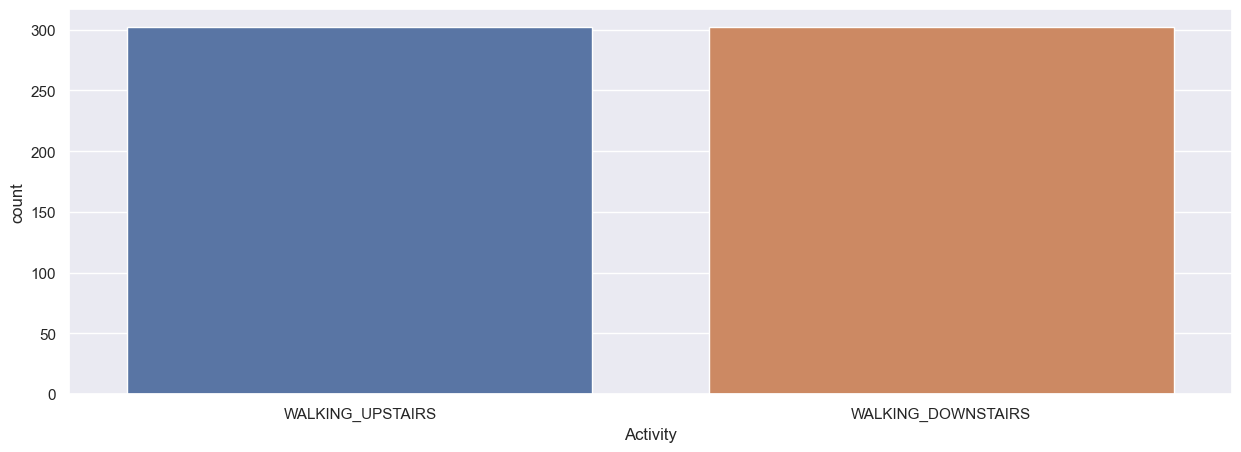

In [181]:
sns.set(style='darkgrid')
plt.figure(figsize=(15,5))
ax = sns.countplot(x='Activity', data=full_data, order=full_data['Activity'].value_counts().index)

In [182]:
# Create labels
full_data_copy = full_data.copy()
label = full_data_copy.pop('Activity')

label

0        WALKING_UPSTAIRS
1        WALKING_UPSTAIRS
2        WALKING_UPSTAIRS
3        WALKING_UPSTAIRS
4        WALKING_UPSTAIRS
              ...        
599    WALKING_DOWNSTAIRS
600    WALKING_DOWNSTAIRS
601    WALKING_DOWNSTAIRS
602    WALKING_DOWNSTAIRS
603    WALKING_DOWNSTAIRS
Name: Activity, Length: 604, dtype: object

In [183]:
tsne_data = full_data_copy.copy()
tsne_data
# Scale data
scl = StandardScaler()
tsne_data = scl.fit_transform(tsne_data)

# Reduce dimensions (speed up)
pca = PCA(n_components=0.9, random_state=3)
tsne_data = pca.fit_transform(tsne_data)

# Transform data
tsne = TSNE(random_state=3)
tsne_transformed = tsne.fit_transform(tsne_data)

# Prepare recorded data
full_data_df = pd.DataFrame(full_data)
cols=[i for i in full_data_df.columns if i not in ["Activity"]]
for col in cols:
    full_data_df[col]=pd.to_numeric(full_data_df[col])

/Users/anastasiapurtova/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/anastasiapurtova/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [184]:
codes = label.astype('category').cat.codes
n_classes = np.unique(codes).size
label_counts = label.value_counts()
label_counts
n_classes

2

In [185]:
# kmeans of our recorded data
kmeans = KMeans(n_clusters=n_classes, n_init=100, 
                random_state=17)
kmeans.fit(tsne_data)
cluster_labels = kmeans.labels_

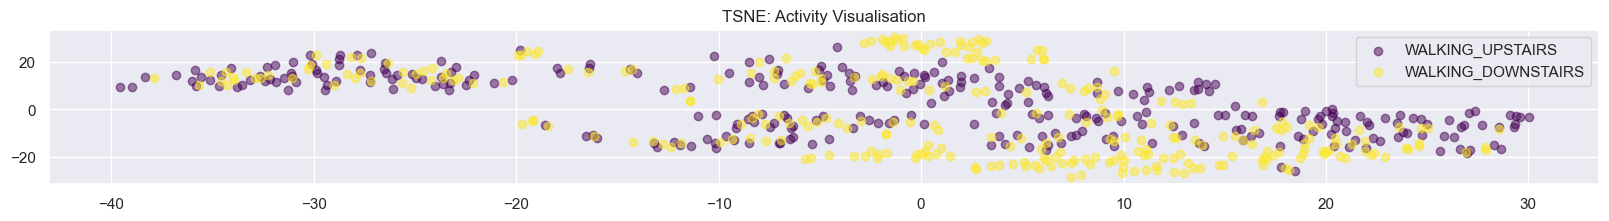

In [186]:
# plot our data
plt.figure(figsize=(20,2))

n_record = label.unique().shape[0]
colormap = get_cmap('viridis')
colors = [rgb2hex(colormap(col)) for col in np.arange(0, 1.01, 1/(n_record-1))]


for i, group in enumerate(label_counts.index):
    mask = (label==group).values
    plt.scatter(x=tsne_transformed[mask][:,0], y=tsne_transformed[mask][:,1], c=colors[i], alpha=0.5, label=group)
plt.title('TSNE: Activity Visualisation')
plt.legend()

In [198]:
kernal_evals = dict()

def evaluate_classification(model, name, X_train, X_test, y_train, y_test):
    train_accuracy = metrics.accuracy_score(y_train, model.predict(X_train))
    test_accuracy = metrics.accuracy_score(y_test, model.predict(X_test))
    
    train_precision = metrics.precision_score(y_train, model.predict(X_train), average='micro')
    test_precision = metrics.precision_score(y_test, model.predict(X_test), average='micro')
    
    train_recall = metrics.recall_score(y_train, model.predict(X_train), average='micro')
    test_recall = metrics.recall_score(y_test, model.predict(X_test), average='micro')
    
    kernal_evals[str(name)] = [train_accuracy, test_accuracy, train_precision, test_precision, train_recall, test_recall]
    print("Training Accuracy " + str(name) + " {}  Test Accuracy ".format(train_accuracy*100) + str(name) + " {}".format(test_accuracy*100))
    print("Training Precesion " + str(name) + " {}  Test Precesion ".format(train_precision*100) + str(name) + " {}".format(test_precision*100))
    print("Training Recall " + str(name) + " {}  Test Recall ".format(train_recall*100) + str(name) + " {}".format(test_recall*100))
    
    actual = y_test
    predicted = model.predict(X_test)
    confusion_matrix = metrics.confusion_matrix(actual, predicted)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['DOWNSTAIRS',
       'UPSTAIRS'])

    fig, ax = plt.subplots(figsize=(10,10))
    ax.grid(False)
    cm_display.plot(ax=ax)


/Users/anastasiapurtova/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy LogisticRegression 87.84530386740332  Test Accuracy LogisticRegression 80.57851239669421
Training Precesion LogisticRegression 87.84530386740332  Test Precesion LogisticRegression 80.57851239669421
Training Recall LogisticRegression 87.84530386740332  Test Recall LogisticRegression 80.57851239669421
Training Accuracy LinearDiscriminantAnalysis 95.30386740331491  Test Accuracy LinearDiscriminantAnalysis 91.73553719008265
Training Precesion LinearDiscriminantAnalysis 95.30386740331491  Test Precesion LinearDiscriminantAnalysis 91.73553719008265
Training Recall LinearDiscriminantAnalysis 95.30386740331491  Test Recall LinearDiscriminantAnalysis 91.73553719008265
Training Accuracy DecisionTreeClassifier 100.0  Test Accuracy DecisionTreeClassifier 71.48760330578511
Training Precesion DecisionTreeClassifier 100.0  Test Precesion DecisionTreeClassifier 71.48760330578511
Training Recall DecisionTreeClassifier 100.0  Test Recall DecisionTreeClassifier 71.48760330578511


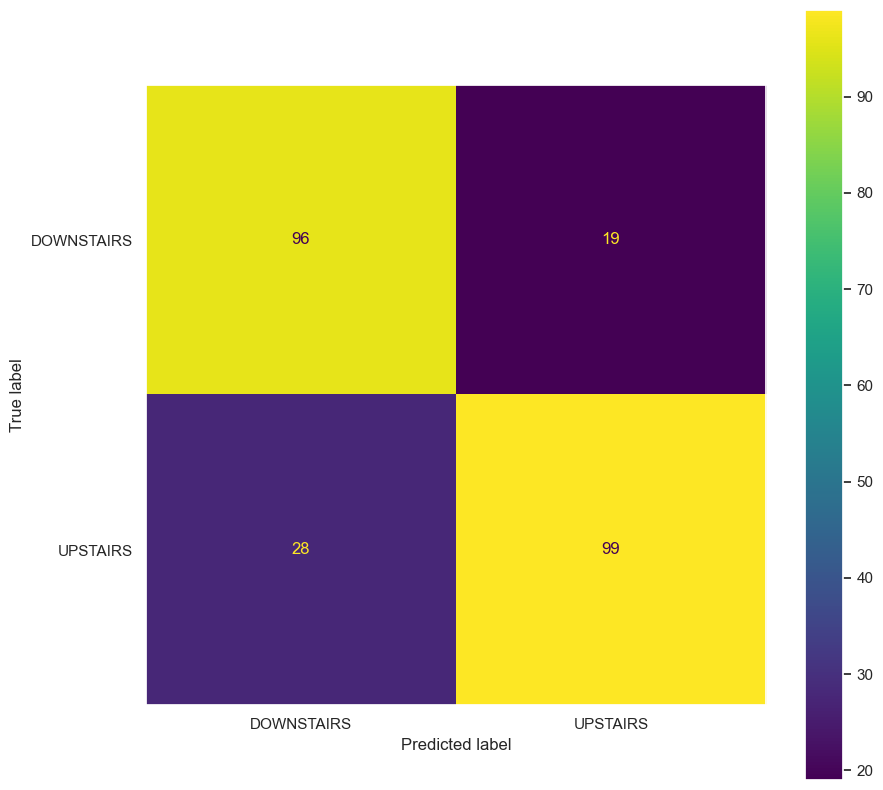

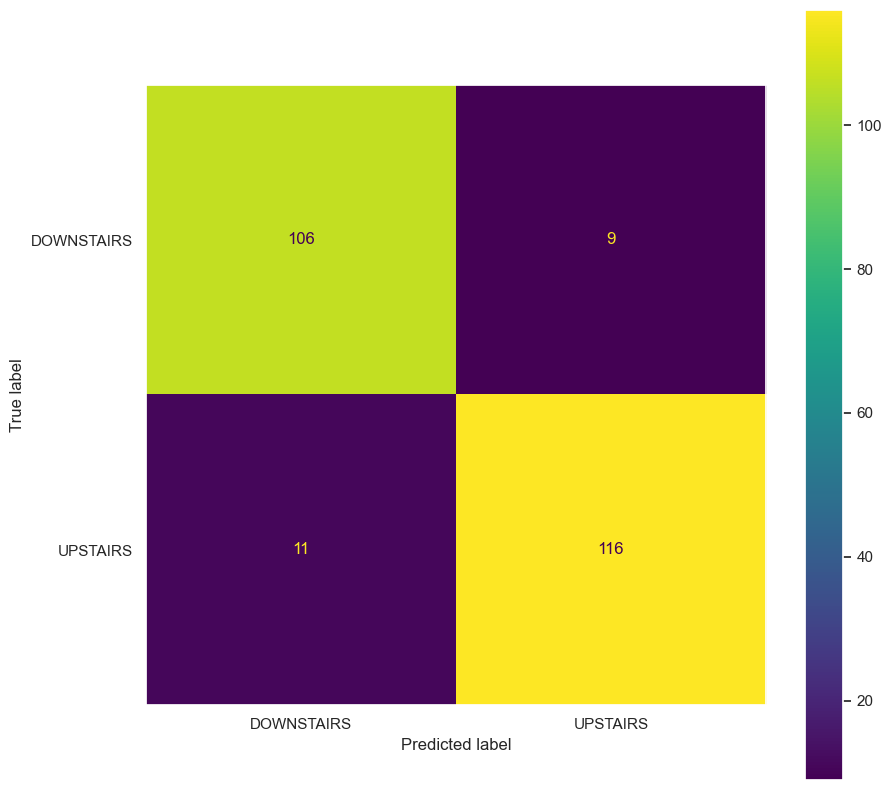

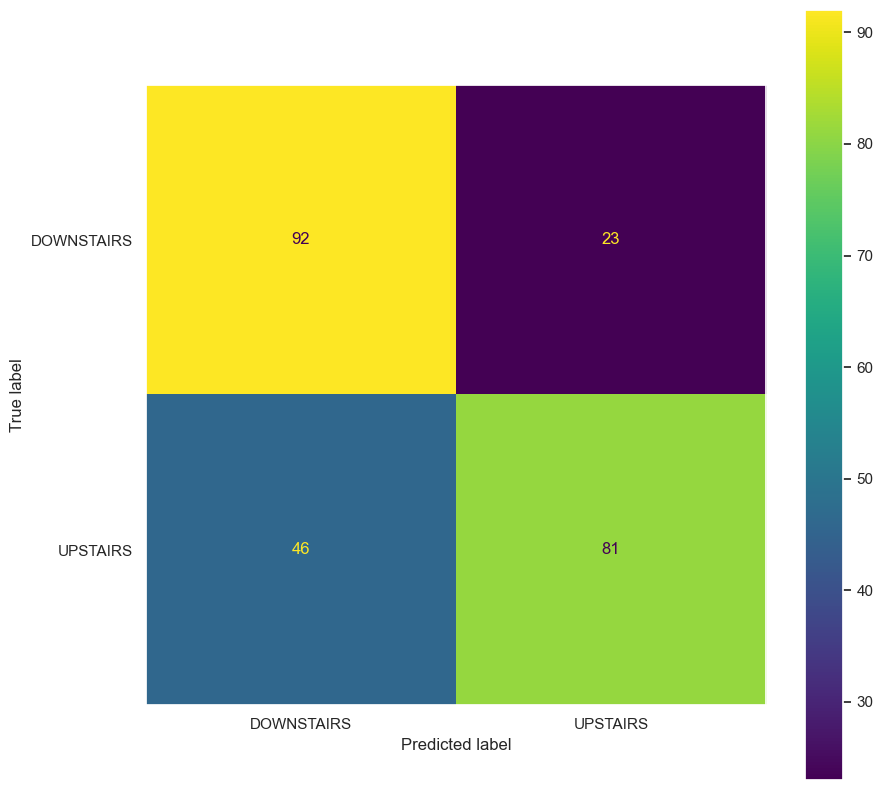

In [206]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

X = full_data.drop(['Activity'], axis=1)
y = full_data['Activity']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4, shuffle=True)
lrm = LogisticRegression().fit(x_train, y_train)
ld = LinearDiscriminantAnalysis().fit(x_train, y_train)
tdt = DecisionTreeClassifier().fit(x_train, y_train)
evaluate_classification(lrm, "LogisticRegression", x_train, x_test, y_train, y_test)
evaluate_classification(ld, "LinearDiscriminantAnalysis", x_train, x_test, y_train, y_test)
evaluate_classification(tdt, "DecisionTreeClassifier", x_train, x_test, y_train, y_test)

In [208]:
# Prepare test data upstairs
test_is_UP = test_new_data_df_no_null['Activity']=='WALKING_UPSTAIRS'
test_new_data_df_no_null_UP = test_new_data_df_no_null[test_is_UP]


x_test_UP = test_new_data_df_no_null_UP
x_test_UP = x_test_UP.drop(['Activity'], axis=1)


y_test_len_UP = test_new_data_df_no_null_UP
y_test_UP = y_test_len_UP['Activity']


# Prepare test data downstairs
test_is_DOWN = test_new_data_df_no_null['Activity']=='WALKING_DOWNSTAIRS'
test_new_data_df_no_null_DOWN = test_new_data_df_no_null[test_is_DOWN]


# x_test_DOWN = test_new_data_down_home_df_no_null
x_test_DOWN = test_new_data_down_home_df_no_null
x_test_DOWN = x_test_DOWN.drop(['Activity'], axis=1)


# y_test_len_DOWN = test_new_data_down_home_df_no_null
y_test_len_DOWN = test_new_data_df_no_null
y_test_DOWN = y_test_len_DOWN['Activity']


if len(x_test_DOWN) > len(x_test_UP):
    x_test_DOWN = x_test_DOWN[:len(x_test_UP)]

if len(y_test_DOWN) > len(y_test_UP):
    y_test_DOWN = y_test_DOWN[:len(y_test_UP)]

print(len(x_test_UP), len(y_test_UP))
print(len(x_test_DOWN), len(y_test_DOWN))

151 151
151 151


In [209]:
import pickle

file_name = 'pickle_model.plk'
with open(file_name, 'wb') as file:
    pickle.dump(tdt, file)


with open(file_name, 'rb') as file:
    pickle_model = pickle.load(file)

scoreUP = pickle_model.score(x_test_UP, y_test_UP)
print("Test Score for UP : {0:.2f} %".format(100*scoreUP))
scoreDOWN = pickle_model.score(x_test_DOWN, y_test_DOWN)
print("Test Score for Down : {0:.2f} %".format(100*scoreDOWN))

Test Score for UP : 90.07 %
Test Score for Down : 79.47 %
